# Bike Sharing Assignment

### Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

> Which variables are significant in predicting the demand for shared bikes.

> How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

### Business Goal
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

### Dataset Characteristics
- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

## Step 0: Importing packages/libraries

In [1797]:
#IGNORE WARNINGS
import warnings
warnings.filterwarnings('ignore')

In [1798]:
#IMPORT DATA MANIPULATION AND CALCULATION PACKAGES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#IMPORT MODELLING PACKAGES
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

## Step 1: Reading and Understanding the Dataset

In [1799]:
#IMPORT AND READ THE DATASET
bike = pd.read_csv('day.csv')

In [1800]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1801]:
bike.shape

(730, 16)

In [1802]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [1803]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [1804]:
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Step 1.1: Data cleaning and maintaining readability

In [1805]:
# MAKE DUPLICATE OF THE DATASET AND DROP THE DUPLICATES DATA
bike_dup = bike.copy()
bike_dup.drop_duplicates(subset=None, inplace=True)
bike_dup.shape

(730, 16)

In [1806]:
# Mapping the dataset with the understandable value according to the guide provided
bike.season = bike.season.map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})
bike.mnth = bike.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bike.weekday = bike.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})
bike.weathersit = bike.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [1807]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,0,Jan,0,Sat,0,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,Jan,0,Sun,0,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1808]:
# Dropping unwanted columns
# Instant is just the index of the row, thus not required
# Casual and registered columns are the inclusions of cnt thus not required
# dteday is also not required as the same thing can be achieved from the mnth column and yr column

bike.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [1809]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [1810]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [1811]:
bike.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


## Step 2: Visualising data columns
#### EDA In relation to the total booking count

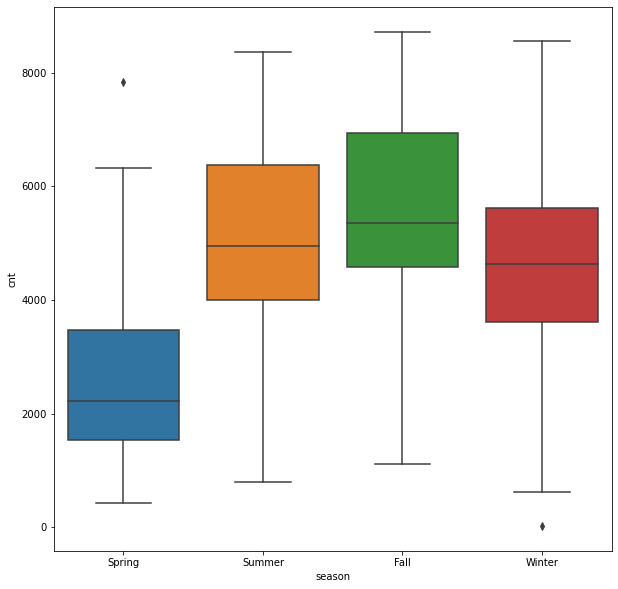

In [1812]:
# SEASON VS CNT
plt.figure(figsize=(10, 10))
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.show()

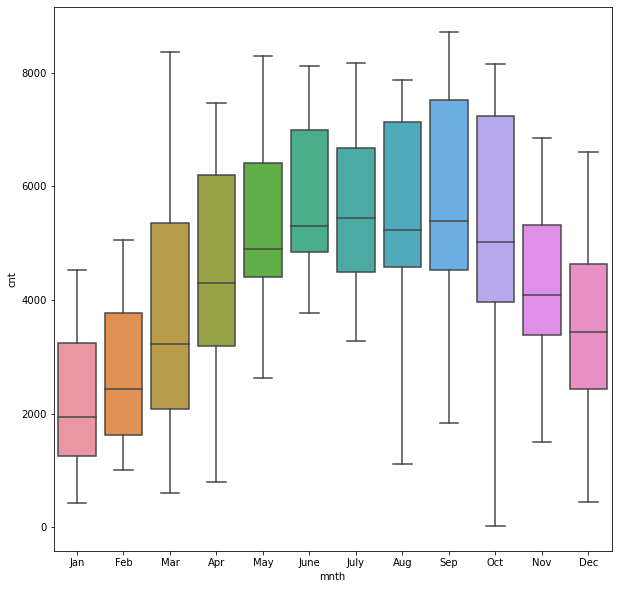

In [1813]:
# MNTH VS CNT

plt.figure(figsize=(10, 10))
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.show()

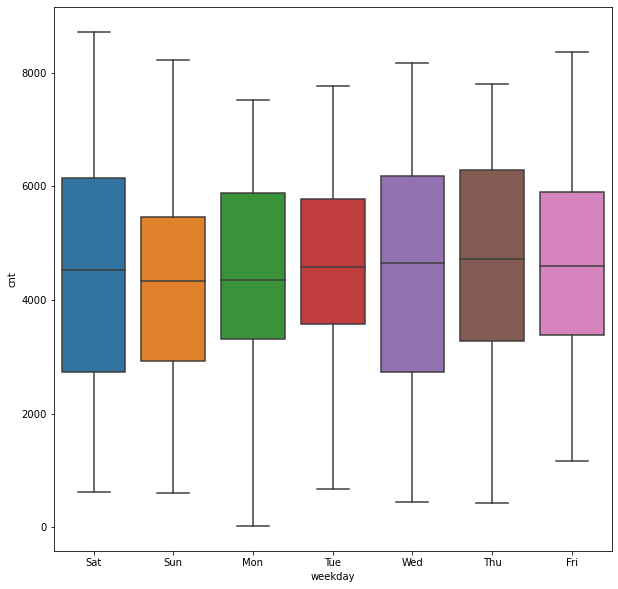

In [1814]:
# WEEKDAY VS CNT

plt.figure(figsize=(10, 10))
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.show()

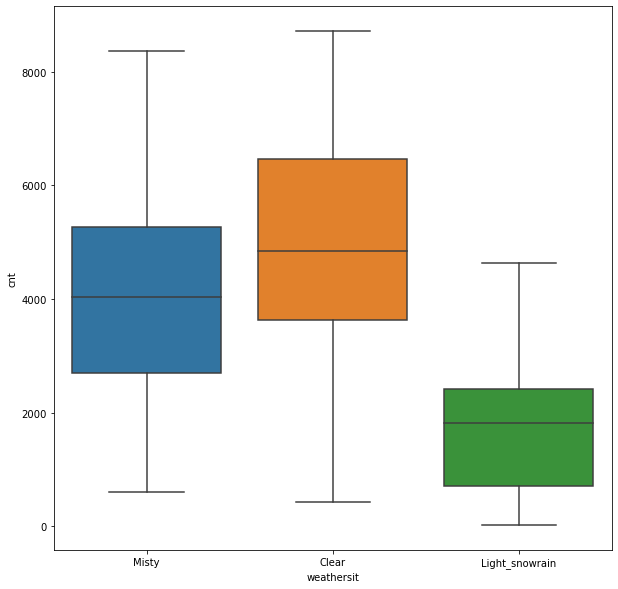

In [1815]:
# WEATHERSIT VS CNT

plt.figure(figsize=(10, 10))
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.show()

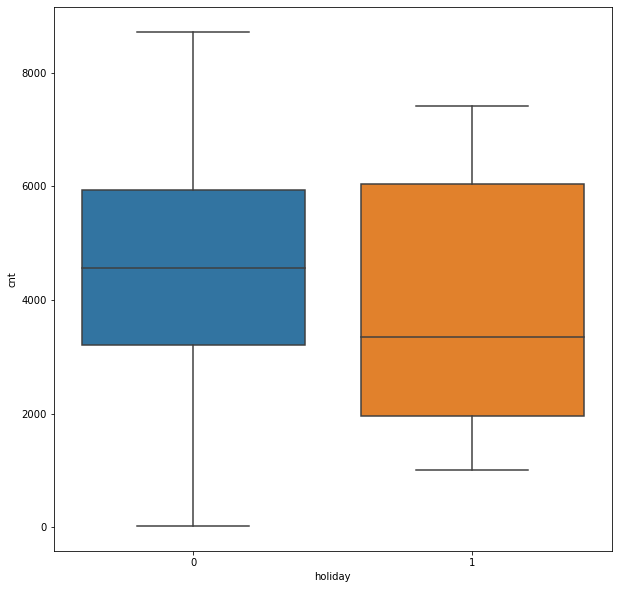

In [1816]:
# HOLIDAY VS CNT

plt.figure(figsize=(10, 10))
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.show()

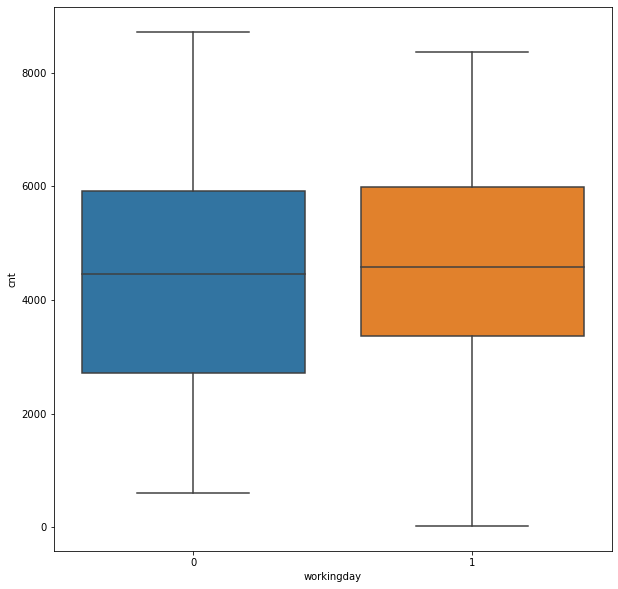

In [1817]:
# WORKINGDAY VS CNT

plt.figure(figsize=(10, 10))
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.show()

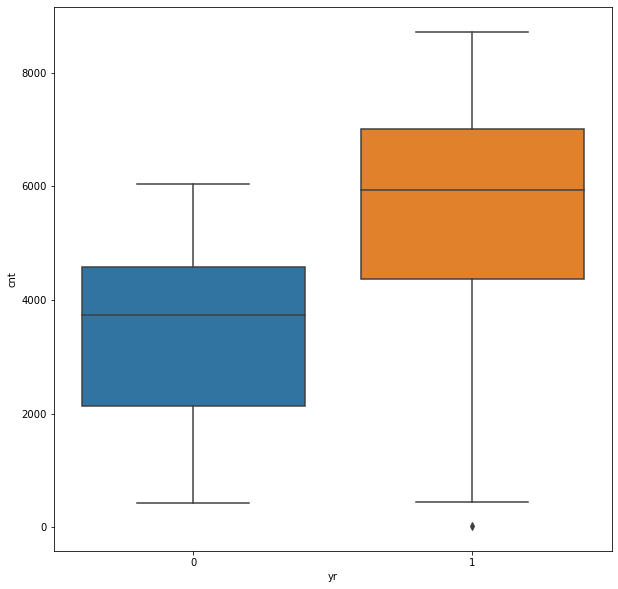

In [1818]:
# YR VS CNT

plt.figure(figsize=(10, 10))
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.show()

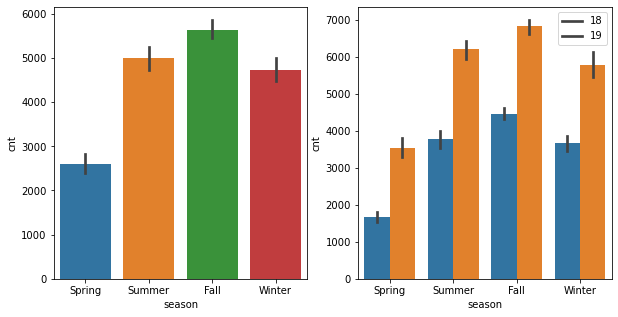

In [1819]:
# BARPLOT SEASON VS CNT WITH YR HUE

plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.barplot('season','cnt',data=bike)
plt.subplot(1,2,2)
sns.barplot('season','cnt',data=bike, hue='yr')
plt.legend(labels=['18', '19'])
plt.show()

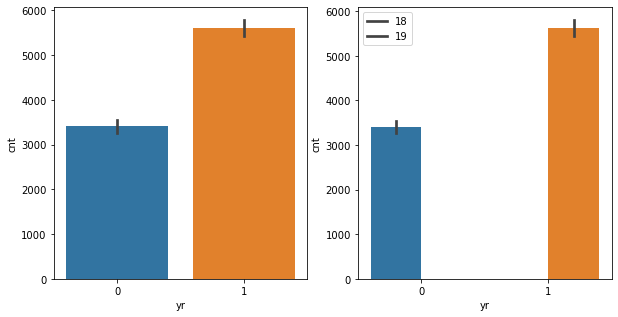

In [1820]:
# BARPLOT YR VS CNT WITH YR HUE

plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.barplot('yr','cnt',data=bike)
plt.subplot(1,2,2)
sns.barplot('yr','cnt',data=bike, hue='yr')
plt.legend(labels=['18', '19'])
plt.show()

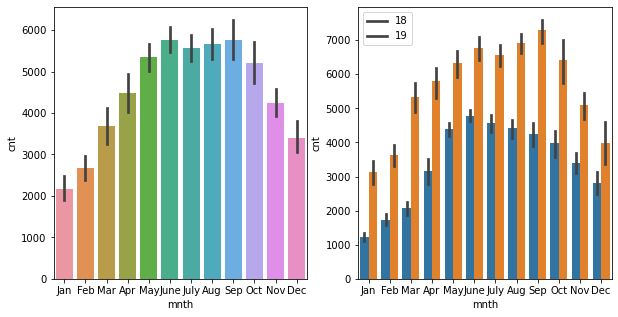

In [1821]:
# BARPLOT MNTH VS CNT WITH YR HUE

plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.barplot('mnth','cnt',data=bike)
plt.subplot(1,2,2)
sns.barplot('mnth','cnt',data=bike, hue='yr')
plt.legend(labels=['18', '19'])
plt.show()

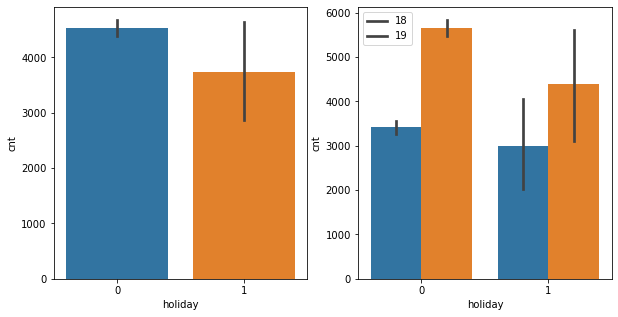

In [1822]:
# BARPLOT HOLIDAY VS CNT WITH YR HUE

plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.barplot('holiday','cnt',data=bike)
plt.subplot(1,2,2)
sns.barplot('holiday','cnt',data=bike, hue='yr')
plt.legend(labels=['18', '19'])
plt.show()

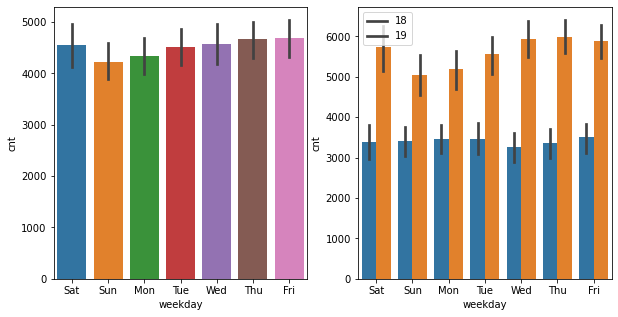

In [1823]:
# BARPLOT WEEKDAY VS CNT WITH YR HUE

plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.barplot('weekday','cnt',data=bike)
plt.subplot(1,2,2)
sns.barplot('weekday','cnt',data=bike, hue='yr')
plt.legend(labels=['18', '19'])
plt.show()

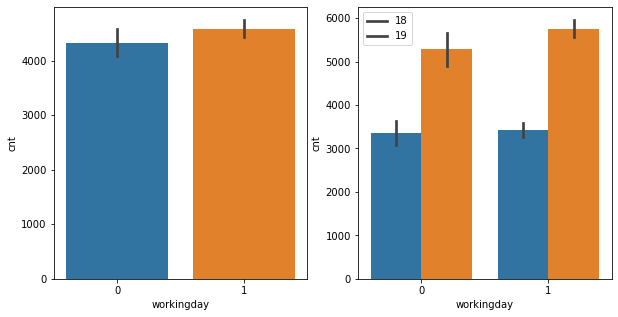

In [1824]:
# BARPLOT WORKINGDAY VS CNT WITH YR HUE

plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.barplot('workingday','cnt',data=bike)
plt.subplot(1,2,2)
sns.barplot('workingday','cnt',data=bike, hue='yr')
plt.legend(labels=['18', '19'])
plt.show()

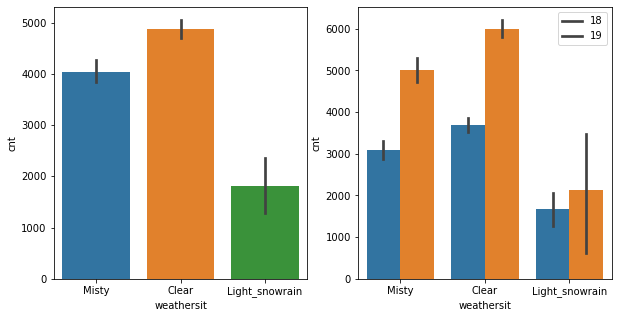

In [1825]:
# BARPLOT WEATHERSIT VS CNT WITH YR HUE

plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.barplot('weathersit','cnt',data=bike)
plt.subplot(1,2,2)
sns.barplot('weathersit','cnt',data=bike, hue='yr')
plt.legend(labels=['18', '19'])
plt.show()

In [1826]:
# DEFINING ALL NUMERICAL COLUMNS IN A ROW FOR ALL FUTURE USES

numerical_col = ['temp','atemp','hum','windspeed','cnt']

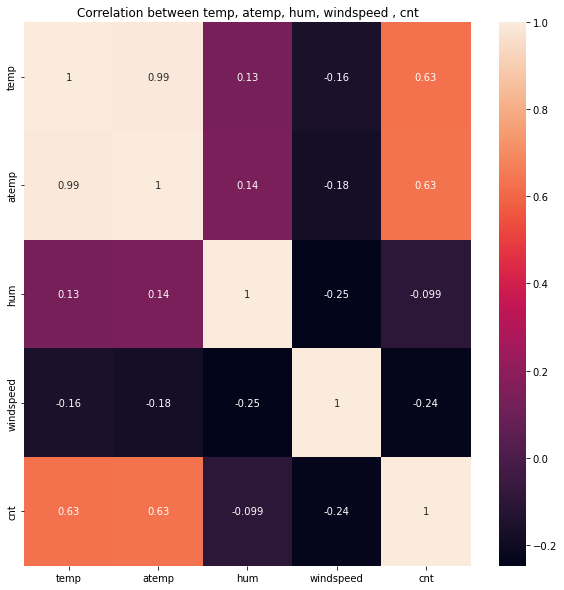

In [1827]:
#CHECKING FOR CORRELATION OF ALL NUM VALUES
plt.figure(figsize = (10,10))
sns.heatmap(bike[numerical_col].corr(), annot = True)
plt.title("Correlation between temp, atemp, hum, windspeed , cnt")
plt.show()

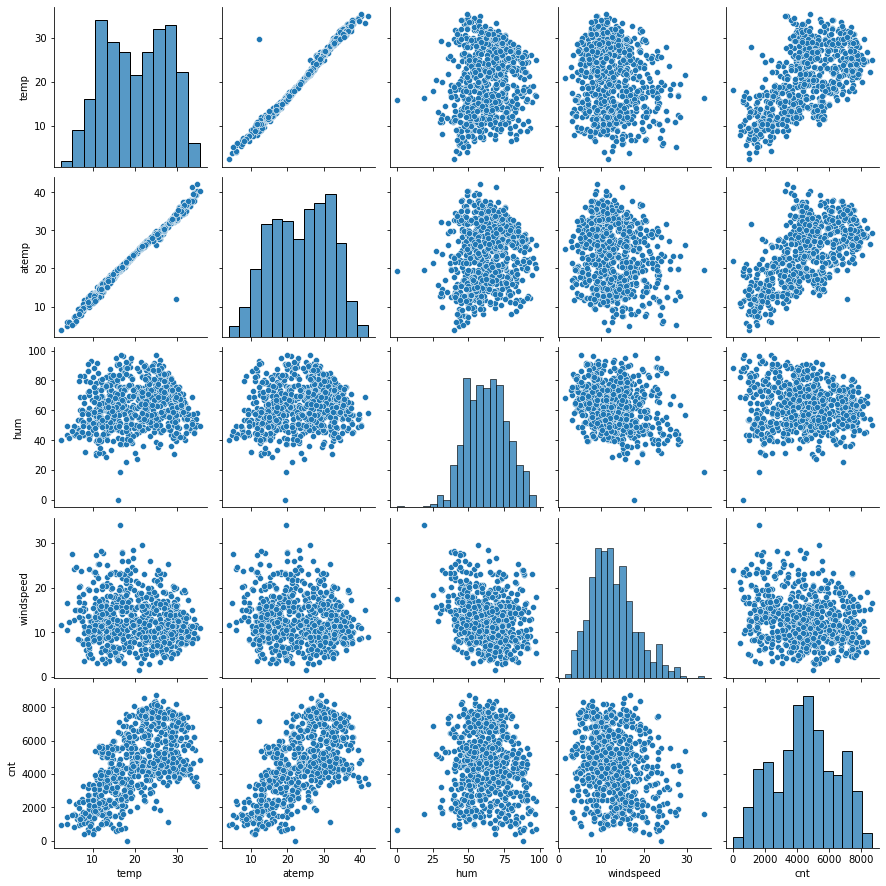

In [1828]:
# PAIRPLOT ALL NUMERICAL VALUES

sns.pairplot(data=bike,vars=numerical_col)
plt.show()

## Step 3: Prepare data for analyse

#### We will create categorical data for some columns for better visualization

In [1829]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [1830]:
# CREATING PANDAS DUMMY FOY CATEGORICAL VARIABLES LIKE MONTHS, WEEKDAYS, WEATHERSIT AND SEASONS

months=pd.get_dummies(bike.mnth,drop_first=True)
weekdays=pd.get_dummies(bike.weekday,drop_first=True)
weathersit=pd.get_dummies(bike.weathersit,drop_first=True)
seasons=pd.get_dummies(bike.season,drop_first=True)

In [1831]:
# CONCAT THE BIKE DATAFRAME WITH THE VARIABLES DEFINED ABOVE
bike_up = pd.concat([bike,months,weekdays,weathersit,seasons],axis=1)

In [1832]:
bike_up.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   yr              730 non-null    int64  
 2   mnth            730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   hum             730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  Aug             730 non-null    uint8  
 13  Dec             730 non-null    uint8  
 14  Feb             730 non-null    uint8  
 15  Jan             730 non-null    uint8  
 16  July            730 non-null    uint8  
 17  June            730 non-null    uin

In [1833]:
bike_up.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Sat,Sun,Thu,Tue,Wed,Light_snowrain,Misty,Spring,Summer,Winter
0,Spring,0,Jan,0,Sat,0,Misty,14.110847,18.18125,80.5833,...,1,0,0,0,0,0,1,1,0,0
1,Spring,0,Jan,0,Sun,0,Misty,14.902598,17.68695,69.6087,...,0,1,0,0,0,0,1,1,0,0
2,Spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,Spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,1,0,0
4,Spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,1,0,0


In [1834]:
# DROP THE CATEGORICAL COLUMNS AFTER CONCAT THE VARIABLES

bike_up.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [1835]:
bike_up.shape

(730, 30)

## Step 4: distributing data to test and training set

In [1836]:
# SPLIT DATASET TO TESTING AND TRAIN DATASET ON THE RATIO OF 7:3

np.random.seed(0)
bike_train, bike_test = train_test_split(bike_up, train_size = 0.70, random_state = 100)

In [1837]:
bike_test.shape

(220, 30)

In [1838]:
bike_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              220 non-null    int64  
 1   holiday         220 non-null    int64  
 2   workingday      220 non-null    int64  
 3   temp            220 non-null    float64
 4   atemp           220 non-null    float64
 5   hum             220 non-null    float64
 6   windspeed       220 non-null    float64
 7   cnt             220 non-null    int64  
 8   Aug             220 non-null    uint8  
 9   Dec             220 non-null    uint8  
 10  Feb             220 non-null    uint8  
 11  Jan             220 non-null    uint8  
 12  July            220 non-null    uint8  
 13  June            220 non-null    uint8  
 14  Mar             220 non-null    uint8  
 15  May             220 non-null    uint8  
 16  Nov             220 non-null    uint8  
 17  Oct             220 non-null    u

In [1839]:
bike_train.shape

(510, 30)

In [1840]:
bike_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              510 non-null    int64  
 1   holiday         510 non-null    int64  
 2   workingday      510 non-null    int64  
 3   temp            510 non-null    float64
 4   atemp           510 non-null    float64
 5   hum             510 non-null    float64
 6   windspeed       510 non-null    float64
 7   cnt             510 non-null    int64  
 8   Aug             510 non-null    uint8  
 9   Dec             510 non-null    uint8  
 10  Feb             510 non-null    uint8  
 11  Jan             510 non-null    uint8  
 12  July            510 non-null    uint8  
 13  June            510 non-null    uint8  
 14  Mar             510 non-null    uint8  
 15  May             510 non-null    uint8  
 16  Nov             510 non-null    uint8  
 17  Oct             510 non-null    u

In [1841]:
bike_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,...,Sat,Sun,Thu,Tue,Wed,Light_snowrain,Misty,Spring,Summer,Winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,20.108257,23.500287,63.123710,12.834912,4485.337255,0.096078,0.084314,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,7.431626,8.090963,14.153170,5.292031,1950.666077,0.294988,0.278131,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,2.834381,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.606865,16.603063,52.270825,9.041918,3120.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,20.277923,24.131150,63.437500,12.083182,4530.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.615847,30.177700,73.250025,15.750879,5973.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.041700,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1842]:
# APPLY SCALER TO ALL THE NUMERICAL COLUMNS
scaler = MinMaxScaler()
bike_train[numerical_col] = scaler.fit_transform(bike_train[numerical_col])

In [1843]:
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,...,Sat,Sun,Thu,Tue,Wed,Light_snowrain,Misty,Spring,Summer,Winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,0,0,0,0,0,1,0,1,0


In [1844]:
bike_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,...,Sat,Sun,Thu,Tue,Wed,Light_snowrain,Misty,Spring,Summer,Winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


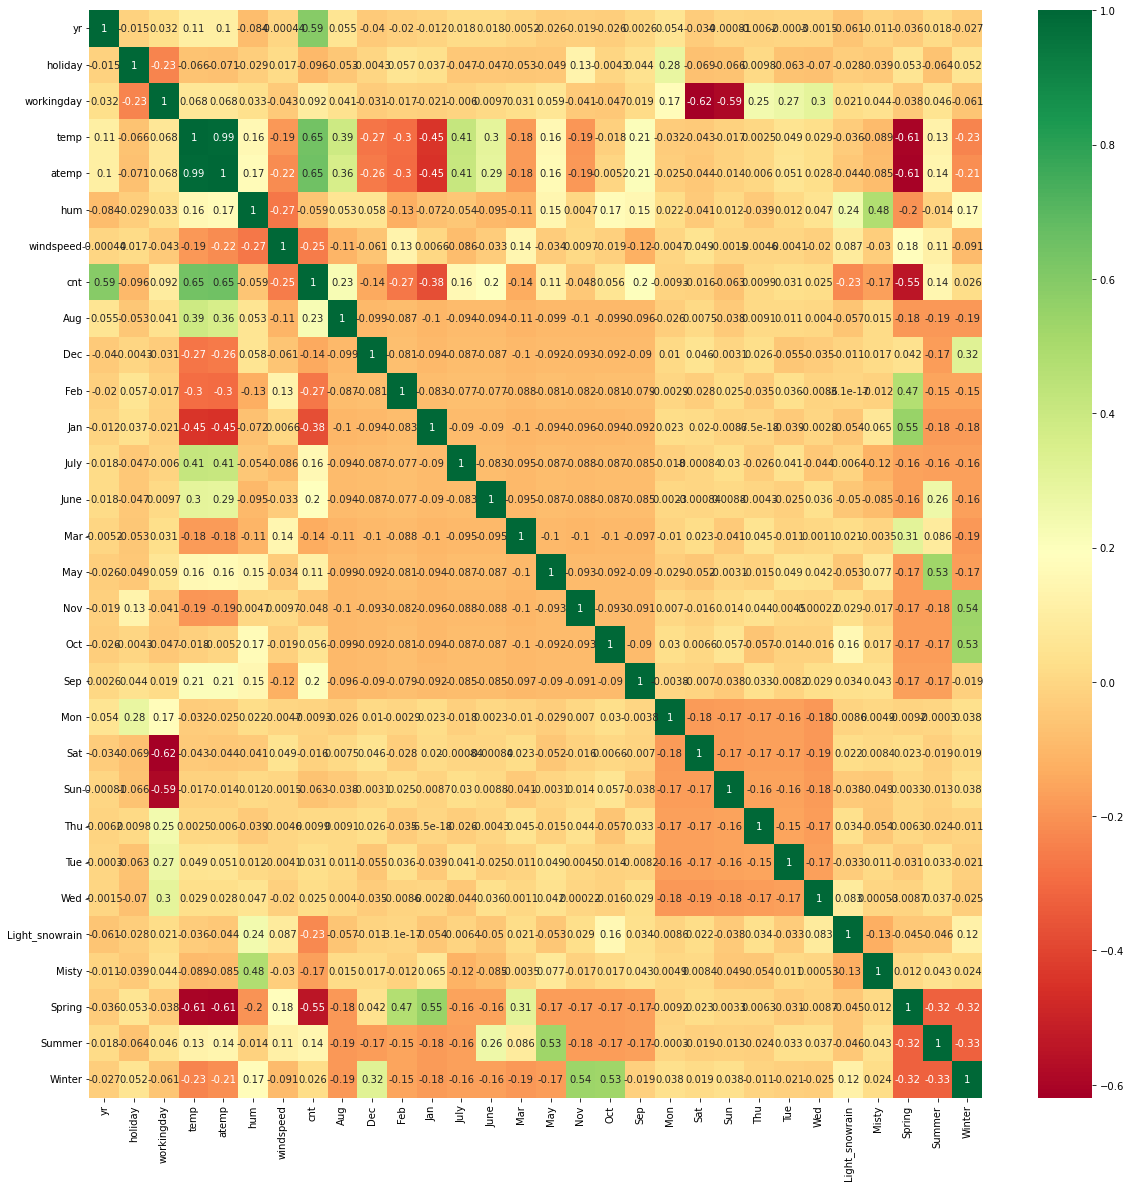

In [1845]:
plt.figure(figsize = (20,20))
sns.heatmap(bike_train.corr(), annot = True, cmap="RdYlGn")
plt.show()

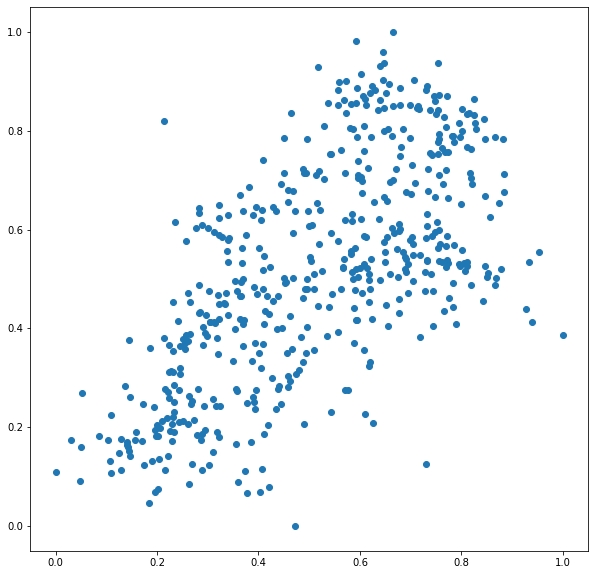

In [1846]:
# AS PER THE CORRELATION DIAGRAM CNT OF THE BOOKING IS HIGHLY COLLINEAR WITH TEMP AND ATEMP,
# THUS LOOKING FOR SCATTER PLOT TO SEE THE RELATION
plt.figure(figsize=[10,10])
plt.scatter(bike_train.atemp, bike_train.cnt)
plt.show()

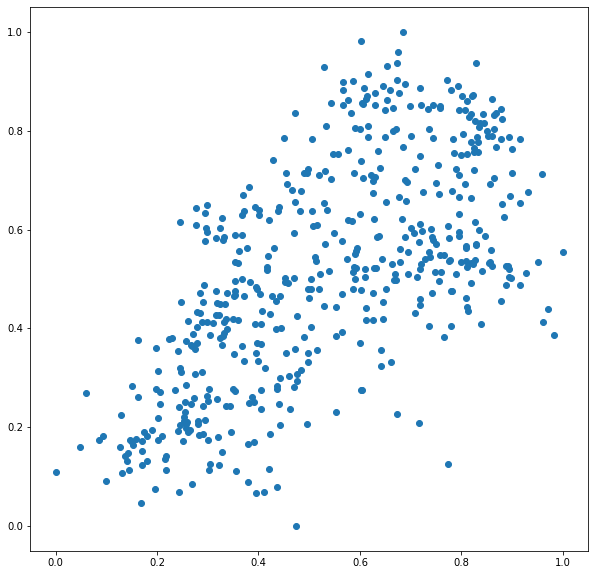

In [1847]:
plt.figure(figsize=[10,10])
plt.scatter(bike_train.temp, bike_train.cnt)
plt.show()

#### Both the scatter plot shows high collinearirty between cnt and (temp and atemp)

## Step 5: Building linear module

In [1848]:
y_train = bike_train.pop('cnt')
x_train = bike_train

#### Performing RFE

In [1849]:
model = LinearRegression()
model.fit(x_train, y_train)

rfe = RFE(model, 15)
rfe = rfe.fit(x_train, y_train)

In [1850]:
# LISTING ALL THE VARIABLES SHORTLISTED BY THE RFE MODEL
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Aug', True, 1),
 ('Dec', False, 5),
 ('Feb', False, 3),
 ('Jan', True, 1),
 ('July', False, 10),
 ('June', False, 6),
 ('Mar', False, 11),
 ('May', False, 4),
 ('Nov', False, 15),
 ('Oct', False, 2),
 ('Sep', True, 1),
 ('Mon', False, 8),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 13),
 ('Tue', False, 9),
 ('Wed', False, 12),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('Spring', False, 14),
 ('Summer', True, 1),
 ('Winter', True, 1)]

In [1851]:
# LISTING AND STORING ALL THE SELECTED COLUMNS IN A LIST
selected_columns = x_train.columns[rfe.support_]
selected_columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Aug', 'Jan',
       'Sep', 'Sat', 'Sun', 'Light_snowrain', 'Misty', 'Summer', 'Winter'],
      dtype='object')

In [1852]:
# LISTING THE REJECTED COLUMNS BY RFE FOR REF
x_train.columns[~rfe.support_]

Index(['atemp', 'Dec', 'Feb', 'July', 'June', 'Mar', 'May', 'Nov', 'Oct',
       'Mon', 'Thu', 'Tue', 'Wed', 'Spring'],
      dtype='object')

In [1853]:
# STORING THE DATAFRAME WITH ONLY SELECTED COLUMNS TO A NEW DATASET VARIABLE
x_train_rfe = x_train[selected_columns]

#### Calculate VIF

In [1854]:
# CALCULATE THE VIF OF THE NEW RFE DATASET
vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

In [1855]:
vif

,Features,VIF
2,workingday,34.00
9,Sat,8.38
10,Sun,8.20
1,holiday,2.24
3,temp,1.94
4,hum,1.88
14,Winter,1.58
12,Misty,1.56
7,Jan,1.55
13,Summer,1.48


## Step 6: Building linear model

In [1856]:
# GENERATING AND PRINTING FIRST LINEAR REGRESSION MODEL
x_train_model_1 = sm.add_constant(x_train_rfe)
lr_1 = sm.OLS(y_train,x_train_model_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.4
Date:                Wed, 11 May 2022   Prob (F-statistic):          1.01e-191
Time:                        20:08:40   Log-Likelihood:                 518.38
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1727      0.023      7.

In [1857]:
# REMOVING WORKINGDAY COLUMN BECAUSE OF VERY HIGH VIF VALUE

x_train_updated = x_train_rfe.drop(['workingday'], axis = 1)

In [1858]:
# CALCULATE THE VIF OF THE NEW RFE DATASET AFTER REMOVING WORKINGDAY COLUMN DUE TO HIGH VIF VALUE

vif = pd.DataFrame()
vif['Features'] = x_train_updated.columns
vif['VIF'] = [variance_inflation_factor(x_train_updated.values, i) for i in range(x_train_updated.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,18.41
2,temp,11.43
4,windspeed,3.68
11,Misty,2.17
13,Winter,2.05
0,yr,2.04
12,Summer,1.96
5,Aug,1.60
6,Jan,1.55
7,Sep,1.32


In [1859]:
# GENERATING AND PRINTING SECOND LINEAR REGRESSION MODEL

x_train_model_2 = sm.add_constant(x_train_updated)
lr_2 = sm.OLS(y_train,x_train_model_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.4
Date:                Wed, 11 May 2022   Prob (F-statistic):          1.01e-191
Time:                        20:08:41   Log-Likelihood:                 518.38
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2495      0.028      8.

In [1860]:
# CALCULATE THE VIF OF THE NEW RFE DATASET AFTER REMOVING HUM COLUMN DUE TO HIGH P VALUE

x_train_updated = x_train_updated.drop(['hum'], axis = 1)

vif = pd.DataFrame()
vif['Features'] = x_train_updated.columns
vif['VIF'] = [variance_inflation_factor(x_train_updated.values, i) for i in range(x_train_updated.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.18
3,windspeed,3.42
0,yr,2.04
11,Summer,1.89
4,Aug,1.60
12,Winter,1.57
10,Misty,1.55
6,Sep,1.32
5,Jan,1.23
7,Sat,1.22


In [1861]:
# GENERATING AND PRINTING THIRD LINEAR REGRESSION MODEL

x_train_model_3 = sm.add_constant(x_train_updated)
lr_3 = sm.OLS(y_train,x_train_model_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     202.8
Date:                Wed, 11 May 2022   Prob (F-statistic):          6.55e-189
Time:                        20:08:41   Log-Likelihood:                 508.90
No. Observations:                 510   AIC:                            -989.8
Df Residuals:                     496   BIC:                            -930.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1614      0.019      8.

In [1862]:
# CALCULATE THE VIF OF THE NEW RFE DATASET AFTER REMOVING SAT COLUMN DUE TO HIGH P VALUE

x_train_updated = x_train_updated.drop(['Sat'], axis = 1)

vif = pd.DataFrame()
vif['Features'] = x_train_updated.columns
vif['VIF'] = [variance_inflation_factor(x_train_updated.values, i) for i in range(x_train_updated.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.14
3,windspeed,3.36
0,yr,2.04
10,Summer,1.89
4,Aug,1.60
11,Winter,1.56
9,Misty,1.54
6,Sep,1.32
5,Jan,1.23
7,Sun,1.17


In [1863]:
# GENERATING AND PRINTING FOURTH LINEAR REGRESSION MODEL

x_train_model_4 = sm.add_constant(x_train_updated)
lr_4 = sm.OLS(y_train,x_train_model_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     219.7
Date:                Wed, 11 May 2022   Prob (F-statistic):          6.83e-190
Time:                        20:08:42   Log-Likelihood:                 508.43
No. Observations:                 510   AIC:                            -990.9
Df Residuals:                     497   BIC:                            -935.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1635      0.019      8.

In [1864]:
# CALCULATE THE VIF OF THE NEW RFE DATASET AFTER REMOVING JAN COLUMN DUE TO HIGH P VALUE

x_train_updated = x_train_updated.drop(['Jan'], axis = 1)

vif = pd.DataFrame()
vif['Features'] = x_train_updated.columns
vif['VIF'] = [variance_inflation_factor(x_train_updated.values, i) for i in range(x_train_updated.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.09
3,windspeed,3.13
0,yr,2.00
9,Summer,1.82
4,Aug,1.59
8,Misty,1.49
10,Winter,1.49
5,Sep,1.31
6,Sun,1.17
7,Light_snowrain,1.08


In [1865]:
# GENERATING AND PRINTING FIFTH LINEAR REGRESSION MODEL

x_train_model_5 = sm.add_constant(x_train_updated)
lr_5 = sm.OLS(y_train,x_train_model_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     236.8
Date:                Wed, 11 May 2022   Prob (F-statistic):          8.46e-190
Time:                        20:08:42   Log-Likelihood:                 505.37
No. Observations:                 510   AIC:                            -986.7
Df Residuals:                     498   BIC:                            -935.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1387      0.017      8.

In [1866]:
# CALCULATE THE VIF OF THE NEW RFE DATASET AFTER REMOVING AUG COLUMN DUE TO HIGH P VALUE

x_train_updated = x_train_updated.drop(['Aug'], axis = 1)

vif = pd.DataFrame()
vif['Features'] = x_train_updated.columns
vif['VIF'] = [variance_inflation_factor(x_train_updated.values, i) for i in range(x_train_updated.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.73
3,windspeed,3.08
0,yr,2.00
8,Summer,1.57
7,Misty,1.48
9,Winter,1.39
4,Sep,1.21
5,Sun,1.17
6,Light_snowrain,1.08
1,holiday,1.04


In [1867]:
# GENERATING AND PRINTING SIXTH LINEAR REGRESSION MODEL

x_train_model_6 = sm.add_constant(x_train_updated)
lr_6 = sm.OLS(y_train,x_train_model_6).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     255.0
Date:                Wed, 11 May 2022   Prob (F-statistic):          6.34e-189
Time:                        20:08:45   Log-Likelihood:                 500.42
No. Observations:                 510   AIC:                            -978.8
Df Residuals:                     499   BIC:                            -932.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1344      0.017      8.

In [1868]:
# LISTING THE FINAL LIST OF COLUMNS AFTER REMOVING THE COLUMNS WITH HIGH VIF AND P VALUE
lr_6.params

const             0.134431
yr                0.232752
holiday          -0.106683
temp              0.547114
windspeed        -0.153073
Sep               0.099353
Sun              -0.049842
Light_snowrain   -0.288321
Misty            -0.080555
Summer            0.087801
Winter            0.131138
dtype: float64

## STEP 7: VALIDATION AND RESIDUAL ANALYSIS OF TRAIN DATASET

In [1869]:
x_train_model_6

,const,yr,holiday,temp,windspeed,Sep,Sun,Light_snowrain,Misty,Summer,Winter
576,1.0,1,0,0.815169,0.264686,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,0,0,1,0,0
728,1.0,1,0,0.245101,0.663106,0,1,0,0,0,0
482,1.0,1,0,0.395666,0.188475,0,0,0,1,1,0
111,1.0,0,0,0.345824,0.380981,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,0,0,0,0,0,0
350,1.0,0,0,0.248216,0.431816,0,0,0,1,0,1
79,1.0,0,0,0.462664,0.529881,0,0,0,1,1,0


In [1870]:
y_train_prediction = lr_6.predict(x_train_model_6)

In [1871]:
y_train_prediction

576    0.772657
426    0.489581
728    0.349935
482    0.562053
111    0.272564
         ...   
578    0.811228
53     0.228237
350    0.254717
79     0.313696
520    0.647775
Length: 510, dtype: float64

In [1872]:
# MULTICOLLINERITY TEST
vif = pd.DataFrame()
vif['Features'] = x_train_updated.columns
vif['VIF'] = [variance_inflation_factor(x_train_updated.values, i) for i in range(x_train_updated.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.73
3,windspeed,3.08
0,yr,2.00
8,Summer,1.57
7,Misty,1.48
9,Winter,1.39
4,Sep,1.21
5,Sun,1.17
6,Light_snowrain,1.08
1,holiday,1.04


Text(0.5, 0, 'Errors')

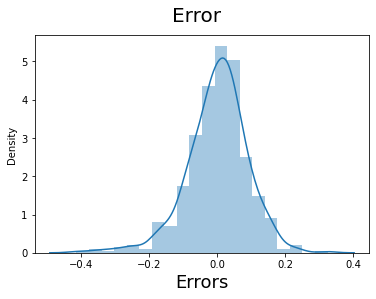

In [1873]:
# PLOT HISTOGRAM DATA OF THE Y TRAIN AND YTRAIN PREDICTION - NORMALITY OF ERROR
fig = plt.figure()
sns.distplot((y_train - y_train_prediction), bins = 20)
fig.suptitle('Error', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

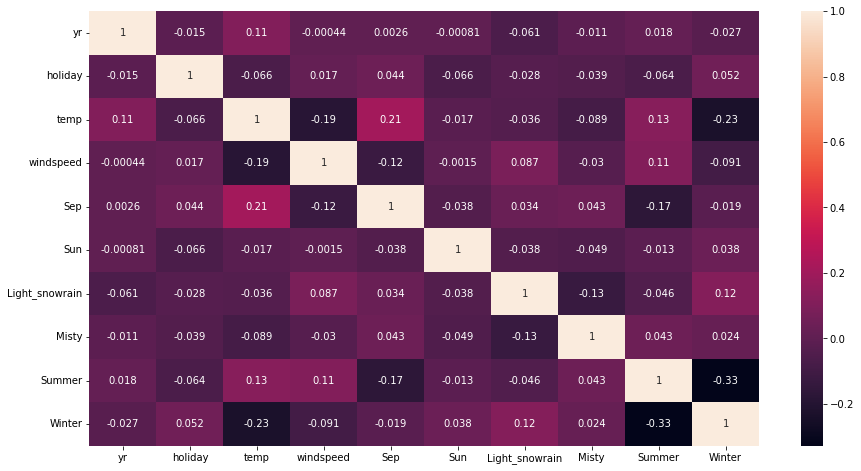

In [1874]:
# VISUALISING CORRELATION OF THE TRAIN DATASET AFTER REMOVING COLUMNS
plt.figure(figsize=(15,8))
sns.heatmap(x_train_updated.corr(),annot = True)
plt.show()

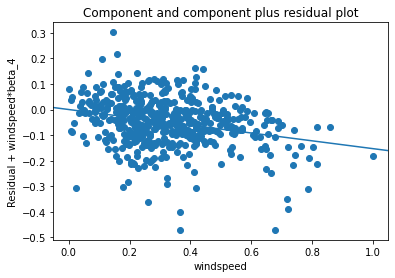

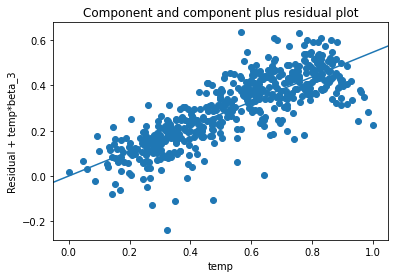

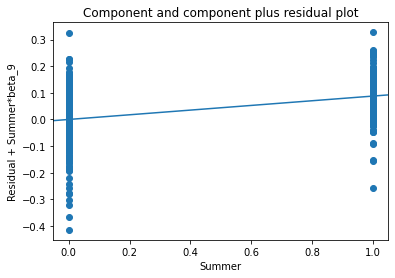

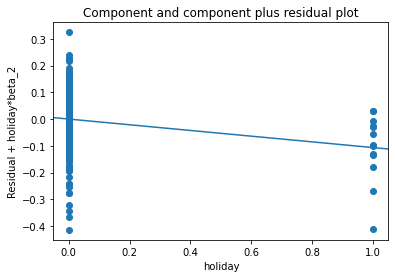

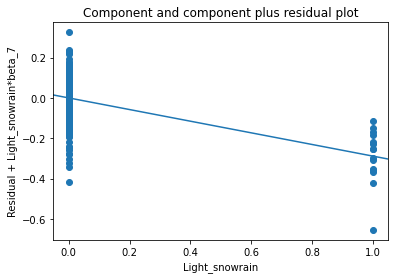

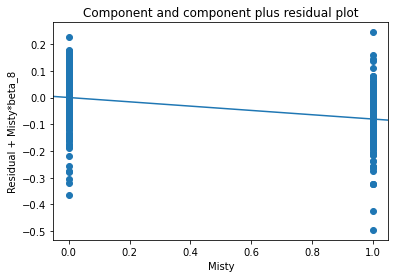

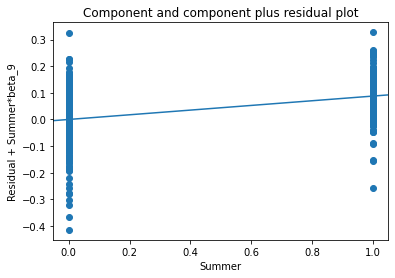

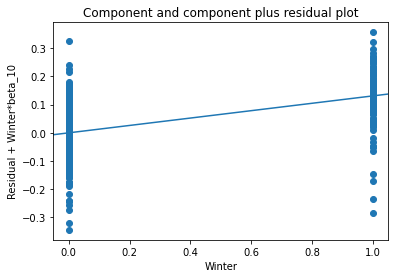

In [1875]:
sm.graphics.plot_ccpr(lr_6, 'windspeed')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'Summer')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'holiday')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'Light_snowrain')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'Misty')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'Summer')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'Winter')
plt.show()


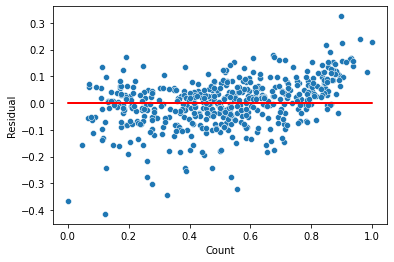

In [1876]:
# CALCULATING AND VISUALISING HOMOSCEDASTICITY
y_train_prediction = lr_6.predict(x_train_model_6)
residual = y_train - y_train_prediction
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

## Step 8: Making final prediction

In [1877]:
# APPLYING SCALER ON THE DETS DATASET AS WELL
bike_test[numerical_col] = scaler.transform(bike_test[numerical_col])
bike_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,...,Sat,Sun,Thu,Tue,Wed,Light_snowrain,Misty,Spring,Summer,Winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,1,0,0,0,0,0,1,0


In [1878]:
bike_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,...,Sat,Sun,Thu,Tue,Wed,Light_snowrain,Misty,Spring,Summer,Winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.059091,0.086364,...,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.236333,0.281541,...,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1879]:
# DISTRIBUTING TEST DATASET TO X_TEST AND Y_TEST
y_test = bike_test.pop('cnt')
x_test = bike_test

In [1880]:
# UPDATING THE X_TEST WITH THE UPDATED LIST OF COLUMN FROM THE TRAIN DATASET
x_test = x_test[x_train_updated.columns]
x_test_model = sm.add_constant(x_test)

In [1881]:
y_prediction = lr_6.predict(x_test_model)

In [1882]:
# CALCULATING THE R2 OF THE TEST DATASET
r2 = r2_score(y_test, y_prediction)
round(r2,4)

0.7965

## Step 9: Evaluating model

### SCATTER PLOT
fig = plt.figure()
plt.scatter(y_test, y_prediction)
fig.suptitle('y_test vs y_prediction') 
plt.xlabel('y_test')
plt.ylabel('y_prediction')

In [1883]:
# CALCULATING THE ADJUSTED R2 FOR THE TEST DATASET
r2_adj = round(1-(1-r2)*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1),4)
print(r2_adj)

0.7868


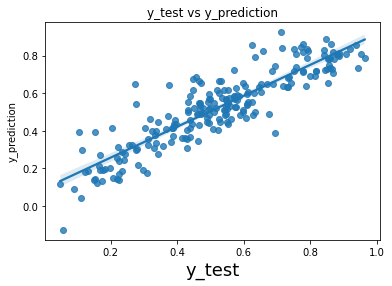

In [1884]:
#REGPLOT
plt.figure()
sns.regplot(x=y_test, y=y_prediction)
plt.title('y_test vs y_prediction')
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_prediction')
plt.show()

# CONCLUSION

### The complany can look after the following columns to which their sales are highly dependent: yr, holiday, temp, windspeed, Sep, Sun, Light_snowrain, Misty, Summer, Winter

### Accuracy of the model
1. Train data R2 => 0.836
2. Test data R2 => 0.7965
3. Train data R2 adjusted => 0.833
4. Test data R2 adjusted => 0.7868